In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv") 
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

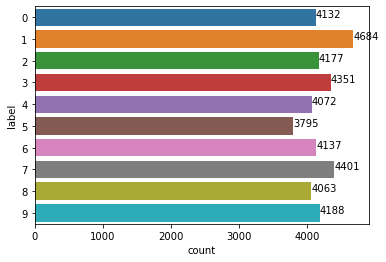

In [4]:
#plot frequencies for the lables in the train dataframe

ax = sns.countplot(y="label",data=train)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+i.get_height()/2,i.get_width(), ha='left')

In [5]:
#Helper function to read the training data

def extract_label_pixel(i,img_height, img_length):
    pixel = np.array(train[train.columns[1:]].iloc[i]).reshape(img_height, img_length)
    label = np.array(train[train.columns[0]].iloc[i])
    return pixel, label

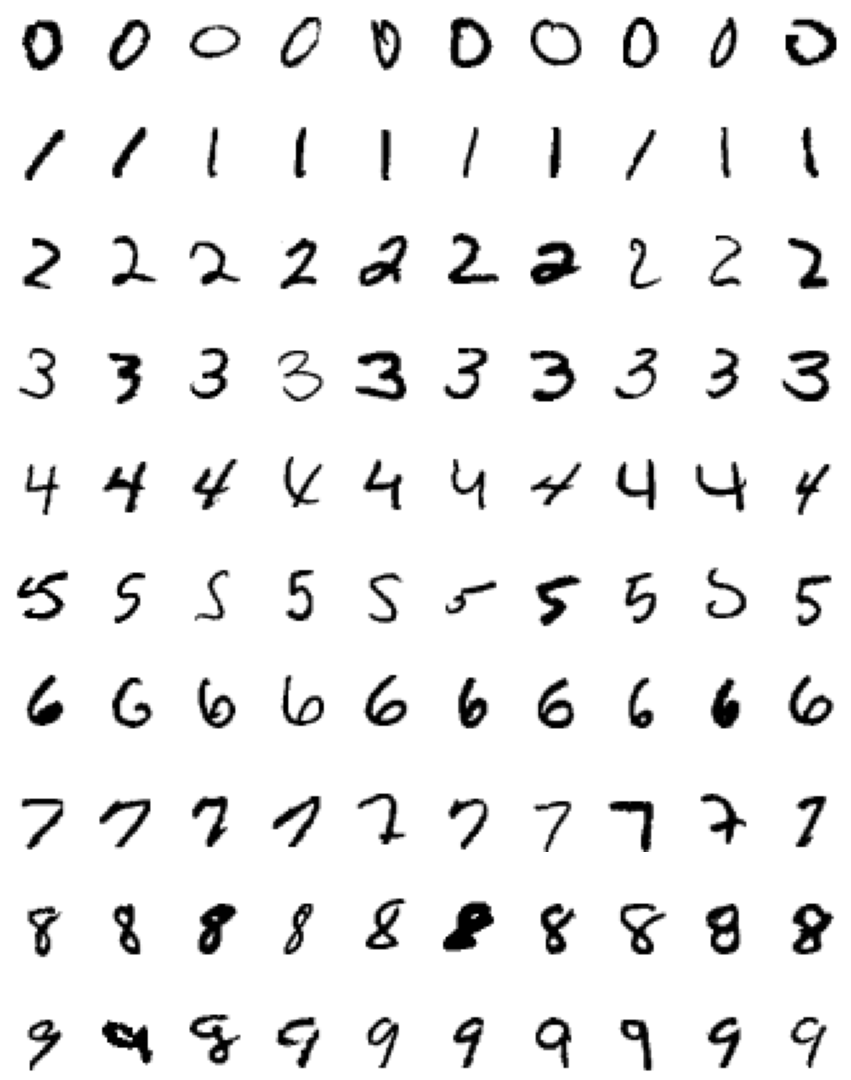

In [6]:
#print 10 random sample for each digit

fig1, ax1 = plt.subplots(10,10, figsize=(15,20))
for v in range(10):
    sample =  train[(train.label == v)].sample(n=10, replace=False).index
    for i,j in enumerate(sample):
        x, y = extract_label_pixel(j,28,28)
        ax1[v][i].imshow(x, cmap="gray_r")
        ax1[v][i].axis('off')
#         ax1[v][i].set_title(y)    

In [7]:
#Normalizing data to feed into tensorflow

y_train = train["label"]
x_train = train.drop(labels = ["label"],axis = 1)
x_train = x_train / 255.0
x_train = x_train.values.reshape(-1,28,28,1)

x_test = test / 255.0
x_test = x_test.values.reshape(-1,28,28,1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=35)

In [8]:
#setting up tensorflow model

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(196, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(98, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(98, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(49, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 196)       1960      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 196)       784       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 98)        172970    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 98)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 98)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 98)        86534     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 98)        0

In [9]:
history = model.fit(x_train, y_train, epochs=20, steps_per_epoch=25, validation_data = (x_val, y_val), verbose = 1, shuffle = True)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 10s 255us/sample - loss: 1.3018 - accuracy: 0.5987 - val_loss: 2.0748 - val_accuracy: 0.8995
Epoch 2/20
37800/37800 [==============================] - 4s 106us/sample - loss: 0.3101 - accuracy: 0.9013 - val_loss: 1.9845 - val_accuracy: 0.9610
Epoch 3/20
37800/37800 [==============================] - 4s 105us/sample - loss: 0.1735 - accuracy: 0.9457 - val_loss: 1.9220 - val_accuracy: 0.9524
Epoch 4/20
37800/37800 [==============================] - 4s 106us/sample - loss: 0.1428 - accuracy: 0.9554 - val_loss: 1.9094 - val_accuracy: 0.9736
Epoch 5/20
37800/37800 [==============================] - 4s 106us/sample - loss: 0.0849 - accuracy: 0.9731 - val_loss: 1.8217 - val_accuracy: 0.9824
Epoch 6/20
37800/37800 [==============================] - 4s 105us/sample - loss: 0.0859 - accuracy: 0.9737 - val_loss: 1.7687 - val_accuracy: 0.9774
Epoch 7/20
37800/37800 [==========================

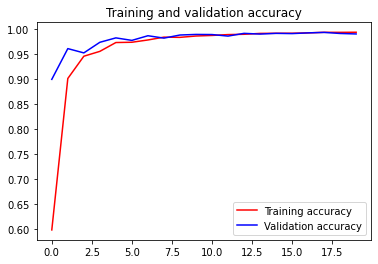

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

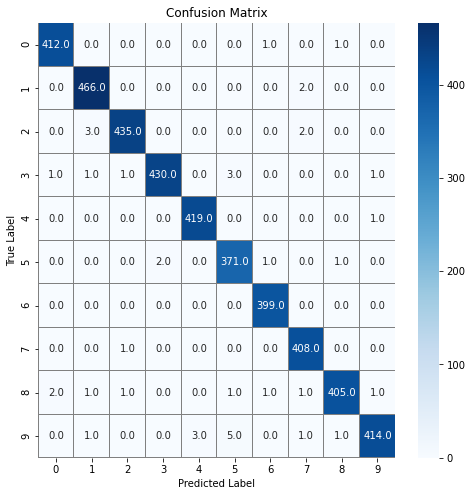

In [11]:
y_pred = np.argmax(model.predict(x_val),axis = 1) 

confusion_mtx = confusion_matrix(np.array(y_val), y_pred) 
# # plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [12]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1)
pred = pd.Series(pred,name="Label")

In [13]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("submissions.csv",index=False)